<a href="https://colab.research.google.com/github/alievrusik/cv-course-hse-summer-2020/blob/master/lecture_2/medianfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Медианный фильтр

In [1]:
import cv2
import numpy as np
from numba import njit
from skimage.data import astronaut

In [2]:
img = astronaut()

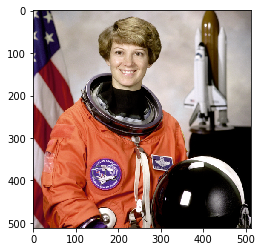

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img)

In [8]:
# @njit
# def median_filter(img, ksize):
#     result = np.zeros_like(img)
#     for channel in range(img.shape[-1]):
#         for x in range(img.shape[0]):
#             for y in range(img.shape[1]):
#                 #result[x, y, channel] = img[x, y, channel]
#                 # TODO: вычислить медиану в окрестности х, y для окна размера ksize
#                 img_window = img[max(0, x - ksize): min(img.shape[0], x + ksize), max(0, y - ksize): min(img.shape[1], y + ksize), channel]
#                 result[x, y, channel] = np.median(img_window)
#     return result

In [4]:
def median_filter(img, ksize):
    return cv2.medianBlur(img, ksize)

## Добавляем случайный шум на изображение

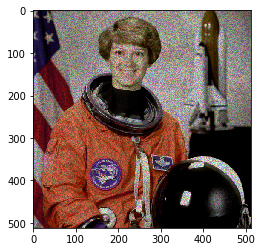

In [6]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img)

In [7]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    plt.title('ksize = {}'.format(ksize))
    return plt.imshow(filtered);

interact(median_filter_show, ksize = (1, 20, 2));

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1, step=2), Output()), _dom_classes=…